In [68]:
import tensorflow as tf 
import sklearn 
import numpy as np 
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
import cv2
import pydot
import graphviz

In [69]:
from tensorflow.keras.utils import img_to_array

In [70]:
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [71]:
base_dir='./cifar10/train'

In [72]:
labels=os.listdir(base_dir)
labels=sorted(labels)
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [73]:
IMAGE_SIZE=32
BATCH_SIZE=32

#pre-processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1,
    featurewise_std_normalization=True
)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 45000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [74]:
batch=next(train_datagen)

In [75]:
print(batch)

(array([[[[ 89.42717 ,  45.427166,  11.718501],
         [ 89.42717 ,  45.427166,  11.718501],
         [ 86.51624 ,  43.071262,   9.338706],
         ...,
         [ 87.631165,  53.868057,  25.732224],
         [ 83.990166,  55.13583 ,  27.      ],
         [ 83.990166,  55.13583 ,  27.      ]],

        [[ 93.99607 ,  48.79725 ,  11.198821],
         [ 93.99607 ,  48.79725 ,  11.198821],
         [ 92.76157 ,  47.92259 ,  10.32416 ],
         ...,
         [ 96.31282 ,  61.400887,  25.6056  ],
         [ 91.19685 ,  61.596466,  25.801178],
         [ 91.19685 ,  61.596466,  25.801178]],

        [[102.60434 ,  55.976383,  14.116144],
         [102.60434 ,  55.976383,  14.116144],
         [103.28949 ,  57.63778 ,  15.777539],
         ...,
         [101.83482 ,  67.64913 ,  22.050148],
         [100.09253 ,  70.72048 ,  25.488192],
         [100.09253 ,  70.72048 ,  25.488192]],

        ...,

        [[193.13976 , 193.88385 , 194.62794 ],
         [193.13976 , 193.88385 , 194.62794 

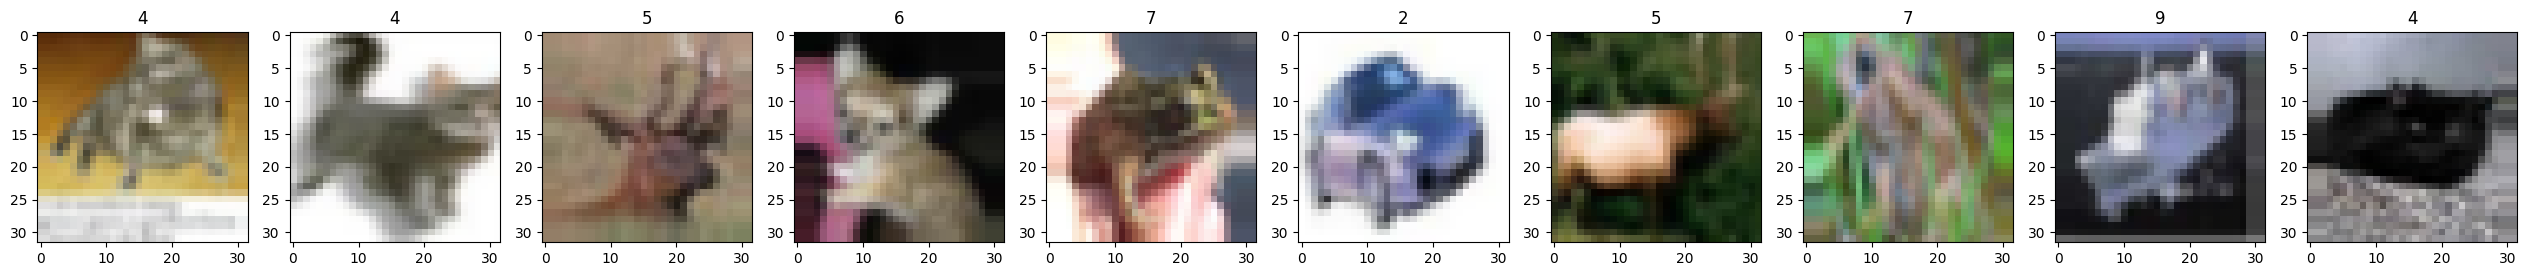

In [76]:
fig, ax = plt.subplots(ncols=10, figsize=(32,32))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(np.argmax(batch[1][idx])+1)

In [77]:
checkpoint_path = "./cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
log_folder='logs'

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# For stopping if the model is not making any progress
earlyStopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

# For plotting graph
graphPlot=TensorBoard(log_dir=log_folder,histogram_freq=1)


# Tensorboard

In [78]:
os.listdir(checkpoint_dir)

['fromInternet',
 'model_save_at_3.h5',
 'model_save_at_1.h5',
 'model.h5',
 'checkpoint',
 'README.md',
 'model_plt.gz',
 'logs',
 'cp.ckpt.data-00000-of-00001',
 '.gitignore',
 'model_plt.png',
 'cp.ckpt.index',
 'model_save_at_4.h5',
 'overhit-model.h5',
 'multiclassimageclassifier.ipynb',
 'cifar10',
 '.ipynb_checkpoints',
 'model_save_at_5.h5',
 '.git',
 'model_plt.gz.pdf',
 'model_save_at_2.h5']

# Define Model

In [93]:
def create_cnn_model():  
    
        #model1
#     model=tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)))
    
#     model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dense(2048,activation='relu'))
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dense(512,activation='relu'))
#     model.add(tf.keras.layers.Dense(10,activation='softmax'))
    
        #model2
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)))
#     model.add(tf.keras.layers.BatchNormalization())

    
#     model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dense(2048,activation='relu'))
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dense(512,activation='relu'))
#     model.add(tf.keras.layers.Dense(10,activation='softmax'))
    
    
        #model3
#     model=tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)))

    
#     model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))

#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dense(2048,activation='relu'))
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dense(512,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(10,activation='softmax'))
    
    
        #model4
#     model=tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)))

    
#     model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(tf.keras.layers.MaxPool2D((2,2)))
    
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dense(2048,activation='relu'))
#     model.add(tf.keras.layers.Dense(1024,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(512,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(10,activation='softmax'))


        #model5
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    
    model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    
    model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024,activation='relu'))
    model.add(tf.keras.layers.Dense(2048,activation='relu'))
    model.add(tf.keras.layers.Dense(1024,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

def plot_metrics_for_training(history):

    plt.subplot(221)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    plt.subplot(222)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0.01, 1])
    plt.legend(loc='lower right')

In [96]:
INPUT_SHAPE = (None, 32, 32 ,3)

In [97]:
CNN_model=create_cnn_model()
CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_35 (Bat  (None, 16, 16, 128)      512       
 chNormalization)                                                
                                                     

# Train Model

In [98]:
history_for_plotting=CNN_model.fit(train_datagen,epochs=45,validation_data=test_datagen,callbacks=[cp_callback,earlyStopping,graphPlot])

Epoch 1/45
1405/1407 [============================>.] - ETA: 0s - loss: 1.4896 - accuracy: 0.4701
Epoch 1: saving model to ./cp.ckpt
1407/1407 [==============================] - 24s 15ms/step - loss: 1.4893 - accuracy: 0.4702 - val_loss: 1.2746 - val_accuracy: 0.5662
Epoch 2/45
1405/1407 [============================>.] - ETA: 0s - loss: 1.0239 - accuracy: 0.6464
Epoch 2: saving model to ./cp.ckpt
1407/1407 [==============================] - 20s 14ms/step - loss: 1.0238 - accuracy: 0.6464 - val_loss: 0.9171 - val_accuracy: 0.6920
Epoch 3/45
1405/1407 [============================>.] - ETA: 0s - loss: 0.8352 - accuracy: 0.7166
Epoch 3: saving model to ./cp.ckpt
1407/1407 [==============================] - 20s 14ms/step - loss: 0.8352 - accuracy: 0.7166 - val_loss: 1.1867 - val_accuracy: 0.6494
Epoch 4/45
1405/1407 [============================>.] - ETA: 0s - loss: 0.7165 - accuracy: 0.7593
Epoch 4: saving model to ./cp.ckpt
1407/1407 [==============================] - 20s 14ms/step - lo

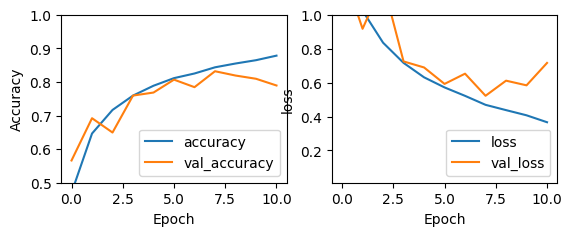

In [99]:
plot_metrics_for_training(history_for_plotting)

# Save Model

In [78]:
CNN_model.save_weights('./model.h5')

# Load saved Model

In [51]:
Loaded_model=create_cnn_model()
Loaded_model.load_weights('./model.h5')

In [52]:
Loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

# Tensorboard

In [33]:
%load_ext tensorboard

In [35]:
log_folder='logs'

In [38]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
%tensorboard --logdir={log_folder}

# Evaluate Model

In [53]:
print(Loaded_model.evaluate(test_datagen))

157/157 [==============================] - 2s 8ms/step - loss: 0.5187 - accuracy: 0.8440
[0.5187176465988159, 0.843999981880188]


In [31]:
from tensorflow.keras.utils import plot_model

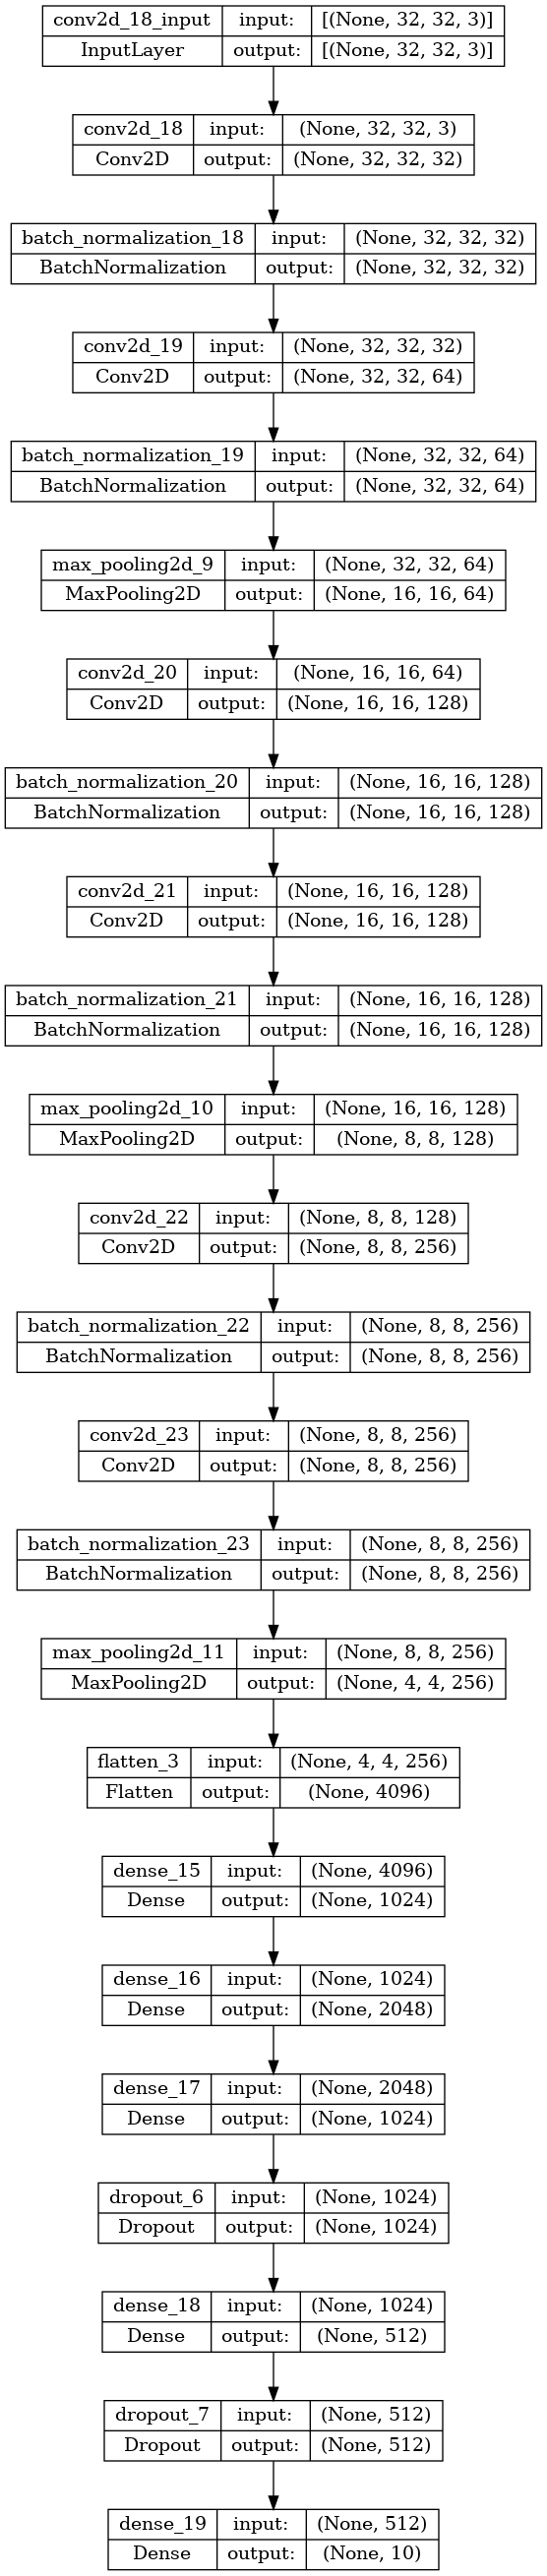

In [54]:
plot_model(Loaded_model, to_file="model_plt.png",show_shapes=True)

In [22]:
!pip install ann-visualizer

/usr/bin/bash: /home/shahgnp/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/bash)
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=397b9c9c6e9c6821e138d306e90a6f102e17dad5130de3fbc3633b58162c7481
  Stored in directory: /home/shahgnp/.cache/pip/wheels/80/94/c7/ea1fe2ebea70fbbfb9425d284cc27f170ab6fe59ef3c31b56f
Successfully built ann-visualizer


In [29]:
from ann_visualizer.visualize import ann_viz
import graphviz

In [30]:
ann_viz(Loaded_model, filename="model_plt.gz",title="CNN")

IndexError: list index out of range

In [22]:
import cv2

In [23]:
label_path='./cifar10/test/'
labels=sorted(os.listdir(label_path))
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [84]:
# #pre=processing
# train_datagen_2=tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255
#     )

# train_datagen_2=train_datagen_2.flow_from_directory(
#     './cifar10/test',
#     target_size=(32,32),
#     batch_size=1,
#     subset='training'
# )

In [85]:
# batch2=next(train_datagen_2)

In [86]:
# train_datagen_2

In [87]:
# batch2

In [88]:
# fig, ax = plt.subplots(ncols=10, figsize=(32,32))
# for idx, img in enumerate(batch2[0][:10]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(np.argmax(batch[1][idx])+1)

In [89]:
# predictions=np.argmax(Loaded_model.predict(train_datagen_2))

In [90]:
# predictions

In [24]:
accuracyArr=[]
for label in labels:
    img_path=os.path.join(label_path,label)
    yes=0
    no=0
    images=os.listdir(img_path)
    for image in images:
        img = tf.keras.preprocessing.image.load_img(os.path.join(img_path,image))
        input_arr = tf.keras.preprocessing.image.img_to_array(img)
        input_arr = np.array([input_arr])  # Convert single image to a batch.
        if (labels[np.argmax(Loaded_model.predict(input_arr))]==label):
            yes+=1
            print('label: ',label)
        else:
            no+=1
    accuracy=(yes/(yes+no))*100
    accuracyArr.append(accuracy)
    

1/1 [==============================] - 0s 277ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 20ms/step
label:  airplane
1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [============================

1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 19ms/step
label:  airplane
1/1 [==============================] - 0s 31ms/step
label:  airplane
1/1 [==============================] - 0s 23ms/step
label:  airplane
1/1 [==============================] - 0s 22ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [==============================] - 0s 26ms/step
label:  airplane
1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 19ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [=============================

label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 17ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 16ms/step
label:  airplane
1/1 [==============================] - 0s 21ms/step
label:  airplane
1/1 [==============================] - 0s 15ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [============

1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 18ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 14ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [==============================] - 0s 13ms/step
label:  airplane
1/1 [=============================

1/1 [==============================] - 0s 17ms/step
label:  automobile
1/1 [==============================] - 0s 16ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [=

1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [=

label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:

label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:

1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 15ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [=

label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 13ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:  automobile
1/1 [==============================] - 0s 14ms/step
label:

1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 16ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 13ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 21ms/step
label:  bird
1/1 [==============================] - 0s 17ms/step
label:  bird
1/1 [==============================] - 0s 17ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [==============================] - 0s 17ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 14ms/step
label:  bird
1/1 [==============================] - 0s 15ms/step
label:  bird
1/1 [====================

1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 18ms/step
label:  cat
1/1 [==============================] - 0s 20ms/step
label:  cat
1/1 [==============================] - 0s 19ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 18ms/step
label:  cat
1/1 [==============================] - 0s 18ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 18ms/step
label:  cat
1/1 [==============================] - 0s 19ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 16ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0s 15ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 13ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 14ms/step
label:  cat
1/1 [==============================] - 0s 17ms/step
label:  cat
1/1 [==============================] - 0

1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 13ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 18ms/step
label:  deer
1/1 [==============================] - 0s 18ms/step
label:  deer
1/1 [==============================] - 0s 18ms/step
label:  deer
1/1 [==============================] - 0s 20ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 17ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 16ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 14ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [==============================] - 0s 15ms/step
label:  deer
1/1 [====================

1/1 [==============================] - 0s 21ms/step
label:  dog
1/1 [==============================] - 0s 20ms/step
label:  dog
1/1 [==============================] - 0s 20ms/step
label:  dog
1/1 [==============================] - 0s 19ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 18ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 19ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 18ms/step
label:  dog
1/1 [==============================] - 0s 19ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 16ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 17ms/step
label:  dog
1/1 [==============================] - 0s 19ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 15ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0s 13ms/step
label:  dog
1/1 [==============================] - 0s 14ms/step
label:  dog
1/1 [==============================] - 0

1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 17ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 22ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 16ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 15ms/step
label:  frog
1/1 [==============================] - 0s 14ms/step
label:  frog
1/1 [==============================] - 0s 13ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 18ms/step
label:  frog
1/1 [==============================] - 0s 20ms/step
label:  frog
1/1 [==============================] - 0s 19ms/step
label:  frog
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [=====

1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 16ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 21ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 17ms/step
label:  horse
1/1 [=====

label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 13ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  horse
1/1 [==============================] - 0s 15ms/step
label:  horse
1/1 [==============================] - 0s 14ms/step
label:  ho

1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 18ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 16ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [====================

1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 17ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 20ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 13ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 14ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [==============================] - 0s 15ms/step
label:  ship
1/1 [====================

label:  truck
1/1 [==============================] - 0s 28ms/step
label:  truck
1/1 [==============================] - 0s 28ms/step
label:  truck
1/1 [==============================] - 0s 35ms/step
label:  truck
1/1 [==============================] - 0s 34ms/step
label:  truck
1/1 [==============================] - 0s 28ms/step
label:  truck
1/1 [==============================] - 0s 22ms/step
label:  truck
1/1 [==============================] - 0s 22ms/step
label:  truck
1/1 [==============================] - 0s 21ms/step
label:  truck
1/1 [==============================] - 0s 20ms/step
label:  truck
1/1 [==============================] - 0s 18ms/step
label:  truck
1/1 [==============================] - 0s 18ms/step
label:  truck
1/1 [==============================] - 0s 30ms/step
label:  truck
1/1 [==============================] - 0s 18ms/step
label:  truck
1/1 [==============================] - 0s 20ms/step
label:  truck
1/1 [==============================] - 0s 27ms/step
label:  tr

label:  truck
1/1 [==============================] - 0s 17ms/step
label:  truck
1/1 [==============================] - 0s 18ms/step
label:  truck
1/1 [==============================] - 0s 16ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  tr

1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck
1/1 [==============================] - 0s 14ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [==============================] - 0s 15ms/step
label:  truck
1/1 [=====

1/1 [==============================] - 0s 17ms/step
label:  truck
1/1 [==============================] - 0s 13ms/step
label:  truck


In [ ]:
# accuracyArr=[]
# for label in labels:
#     img_path=os.path.join(label_path,label)
#     yes=0
#     no=0
#     images=os.listdir(img_path)
#     for image in images:
#         img = cv2.imread(os.path.join(img_path,image))
#         img = np.expand_dims(img/255, 0)
# #         input_arr = tf.keras.preprocessing.image.img_to_array(img)
# #         input_arr = np.array([input_arr])  # Convert single image to a batch.
#         if (labels[np.argmax(Loaded_model.predict(img))]==label):
#             yes+=1
#             print('label: ',label)
#         else:
#             no+=1
#     accuracy=(yes/(yes+no))*100
#     accuracyArr.append(accuracy)
    

In [25]:
for label in labels:
    print('Accuracy: label= ', label, ' = ',accuracyArr[labels.index(label)])

Accuracy: label=  airplane  =  88.6
Accuracy: label=  automobile  =  97.0
Accuracy: label=  bird  =  76.4
Accuracy: label=  cat  =  58.9
Accuracy: label=  deer  =  84.1
Accuracy: label=  dog  =  68.8
Accuracy: label=  frog  =  92.80000000000001
Accuracy: label=  horse  =  86.4
Accuracy: label=  ship  =  96.1
Accuracy: label=  truck  =  84.0


Last iteration
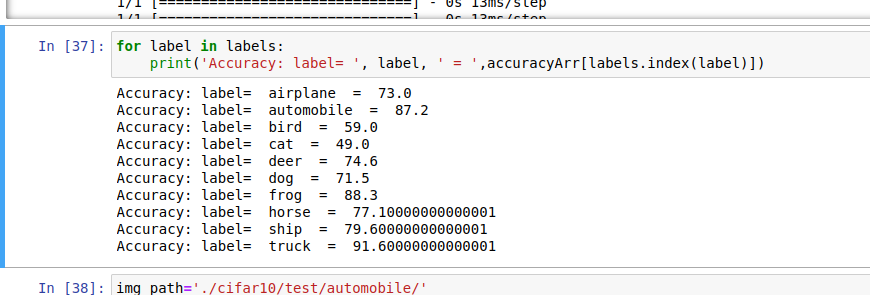

In [30]:
img_path='./cifar10/test/frog/'

In [31]:
images=os.listdir(img_path)

In [32]:
yes=0
no=0
label='automobile'
for image in images:
    img = tf.keras.preprocessing.image.load_img(os.path.join(img_path,image))
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    if (labels[np.argmax(Loaded_model.predict(input_arr))]==label):
        yes+=1
    else:
        no+=1

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


In [33]:
print('Yes: ',yes)
print('No: ', no)
print('accuracy: ',(yes/(yes+no))*100)

Yes:  8
No:  992
accuracy:  0.8


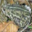

In [34]:
img

In [35]:
input_arr = tf.keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])  # Convert single image to a batch.

In [36]:
labels[np.argmax(Loaded_model.predict(input_arr))]

1/1 [==============================] - 0s 21ms/step


'frog'

In [37]:
#importing and processing input image
import cv2

# os.listdir('./cifar10/test/airplane')

img = cv2.imread('./cifar10/test/airplane/0052.png')
img = np.expand_dims(img/255, 0)
labels[np.argmax(Loaded_model.predict(img))]

1/1 [==============================] - 0s 20ms/step


'deer'

# Testing over internet images

In [29]:
internet_path='./fromInternet/'

In [30]:
images=os.listdir(internet_path)
images

['ship.jpg', 'frog.jpg', 'airplane.jpg', 'deer.jpg', 'dog.jpg', 'horse.jpg']

In [36]:
for image in images:
    img = tf.keras.preprocessing.image.load_img(os.path.join(internet_path,image),target_size=(32, 32))
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    print(image, ' is:', labels[np.argmax(Loaded_model.predict(input_arr))])

1/1 [==============================] - 0s 19ms/step
ship.jpg  is: ship
1/1 [==============================] - 0s 18ms/step
frog.jpg  is: frog
1/1 [==============================] - 0s 18ms/step
airplane.jpg  is: airplane
1/1 [==============================] - 0s 19ms/step
deer.jpg  is: deer
1/1 [==============================] - 0s 18ms/step
dog.jpg  is: dog
1/1 [==============================] - 0s 18ms/step
horse.jpg  is: horse


In [33]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]